In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv('data/clustering.csv') 
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [70]:
# Check Null
print(data.isnull().sum())
# => We only use ApplicantIncome and LoanAmount in this case to clustering => No Null     

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64


In [71]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


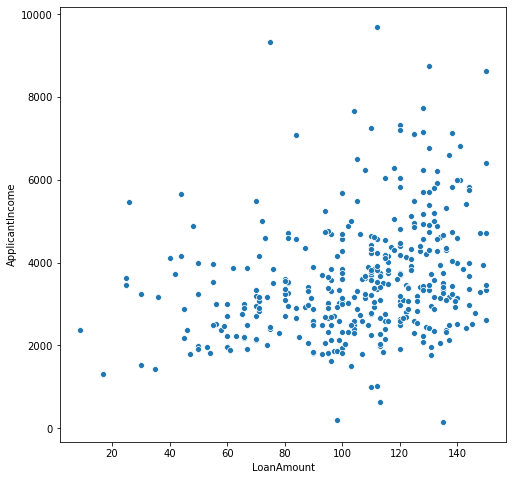

In [72]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=data, x='LoanAmount', y='ApplicantIncome')
plt.show()

Text(0.5, 0, 'LoanAmount / ApplicantIncome')

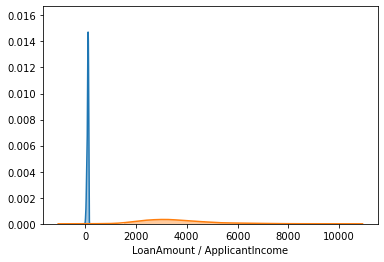

In [73]:
#Visualizing the data - displot
plot_LoanAmount = sns.distplot(data["LoanAmount"])
plot_sApplicantIncome = sns.distplot(data["ApplicantIncome"])
plt.xlabel('LoanAmount / ApplicantIncome')

- Analyze: Its eyes observed that data could be discriminated into 3 clusters
- Applying K-Means Clustering for this section, checking the number of cluster (k) by Elbow method

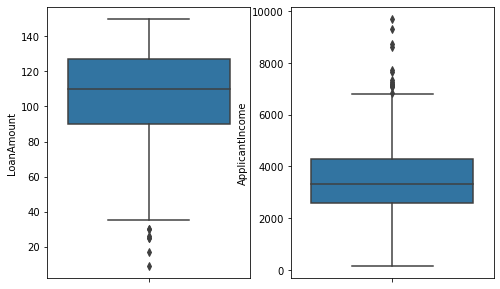

In [74]:
# Data visualization
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.boxplot(data.LoanAmount, orient="v")
plt.subplot(1,2,2)
sns.boxplot(data.ApplicantIncome, orient="v")
plt.show()
# => Both have some outliers

In [75]:
LoanAmount_ApplicantIncome = data[['LoanAmount','ApplicantIncome']].astype('float64')
LoanAmount_ApplicantIncome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LoanAmount       381 non-null    float64
 1   ApplicantIncome  381 non-null    float64
dtypes: float64(2)
memory usage: 6.1 KB


In [76]:
# Applying Robust Scaler to keep the outliers
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
robust_scaler = scaler.fit_transform(LoanAmount_ApplicantIncome)
df = pd.DataFrame(robust_scaler, columns=['LoanAmount_Scaler', 'ApplicantIncome_Scaler'])
df.head()

,LoanAmount_Scaler,ApplicantIncome_Scaler
0,0.486486,0.740521
1,-1.189189,-0.197275
2,0.270270,-0.444313
3,0.837838,1.579976
4,-0.405405,-0.592417


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LoanAmount_Scaler       381 non-null    float64
 1   ApplicantIncome_Scaler  381 non-null    float64
dtypes: float64(2)
memory usage: 6.1 KB


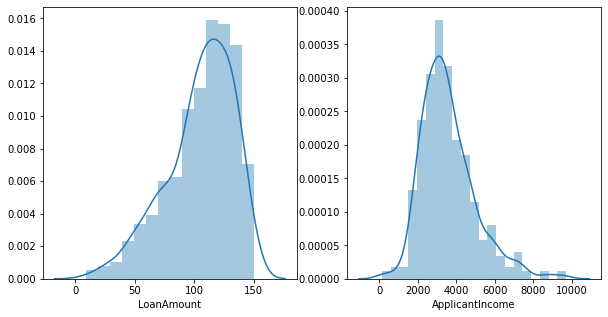

In [78]:
# Exploring Data
# Data Distribution
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.distplot(data.LoanAmount)
plt.subplot(1, 2, 2)
sns.distplot(data.ApplicantIncome)
plt.show()

In [79]:
data.skew()

ApplicantIncome      1.119751
CoapplicantIncome    8.660692
LoanAmount          -0.804282
Loan_Amount_Term    -2.204931
Credit_History      -1.838651
dtype: float64

In [80]:
data.kurtosis()

ApplicantIncome        2.063464
CoapplicantIncome    108.590665
LoanAmount             0.224007
Loan_Amount_Term       5.778382
Credit_History         1.388518
dtype: float64

- Analyzie: As obsedved data, we found that:
     * Data dis not have Gaussian Distribute

In [81]:
data['LoanAmount_Scaler'] = df.LoanAmount_Scaler.values
data['ApplicantIncome_Scaler'] = df.ApplicantIncome_Scaler.values
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Scaler,ApplicantIncome_Scaler
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.486486,0.740521
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-1.189189,-0.197275
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.270270,-0.444313
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.837838,1.579976
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,-0.405405,-0.592417


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 381 non-null    object 
 1   Gender                  376 non-null    object 
 2   Married                 381 non-null    object 
 3   Dependents              373 non-null    object 
 4   Education               381 non-null    object 
 5   Self_Employed           360 non-null    object 
 6   ApplicantIncome         381 non-null    int64  
 7   CoapplicantIncome       381 non-null    float64
 8   LoanAmount              381 non-null    float64
 9   Loan_Amount_Term        370 non-null    float64
 10  Credit_History          351 non-null    float64
 11  Property_Area           381 non-null    object 
 12  Loan_Status             381 non-null    object 
 13  LoanAmount_Scaler       381 non-null    float64
 14  ApplicantIncome_Scaler  381 non-null    fl

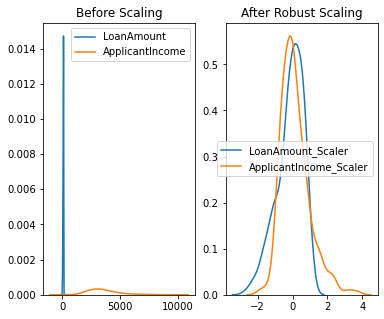

In [83]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,5))
ax1.set_title('Before Scaling')
sns.kdeplot(data['LoanAmount'], ax=ax1)
sns.kdeplot(data['ApplicantIncome'], ax=ax1)

ax2.set_title('After Robust Scaling')
sns.kdeplot(data['LoanAmount_Scaler'], ax=ax2)
sns.kdeplot(data['ApplicantIncome_Scaler'], ax=ax2)

plt.show()

In [93]:
# Select K
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k) # số cụm
    kmeanModel.fit(data[['LoanAmount_Scaler', 'ApplicantIncome_Scaler']])
    distortions.append(sum(np.min(cdist(data[['LoanAmount_Scaler', 'ApplicantIncome_Scaler']], kmeanModel.cluster_centers_,'euclidean'), axis=1)) / data[['LoanAmount_Scaler', 'ApplicantIncome_Scaler']].shape[0])

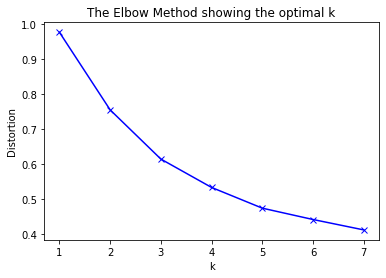

In [94]:
# Elbow Visualization
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [95]:
# Select k = 3 because error not reduce so much
kmeans = KMeans(n_clusters=3)
kmeans.fit(data[['LoanAmount_Scaler', 'ApplicantIncome_Scaler']])

KMeans(n_clusters=3)

In [98]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print("Centroids in Robust scale:")
print(centroids)
print("Centroids in normal:")
normal_centroids = scaler.inverse_transform(centroids)
print(normal_centroids)
print(labels)

Centroids in Robust scale:
[[ 0.17889971 -0.21147786]
 [ 0.33015971  1.31339536]
 [-1.20748874 -0.18960431]]
Centroids in normal:
[[ 116.61928934 2976.02538071]
 [ 122.21590909 5550.01136364]
 [  65.32291667 3012.94791667]]
[1 2 0 1 0 2 0 0 2 1 0 2 1 0 1 0 0 0 0 2 0 2 1 0 0 0 0 2 2 2 0 1 2 2 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 2 1 0 0 0 0 2 0 0 0 0 2 0 2 0 2 0 0 1 0 1 0
 1 0 1 2 2 0 2 0 2 2 2 1 2 2 0 0 0 2 1 1 0 2 0 0 0 1 1 0 2 0 2 2 0 0 0 0 2
 2 0 2 2 2 2 0 0 0 2 0 0 1 2 2 2 0 0 1 0 0 0 0 2 1 2 0 0 1 1 0 2 0 0 0 0 0
 1 0 1 0 1 1 1 0 2 0 0 1 1 1 0 1 1 1 0 2 2 0 0 2 0 2 0 0 2 2 2 0 0 0 0 1 0
 1 1 1 0 0 0 1 0 0 0 0 2 0 2 1 0 0 2 0 0 1 0 1 1 2 1 0 2 1 2 2 2 0 0 0 1 0
 0 2 0 2 1 0 1 1 0 1 0 0 1 1 1 2 1 0 1 1 0 0 0 1 0 0 0 0 2 0 0 0 2 2 0 2 1
 0 2 2 0 2 0 0 1 2 0 1 0 2 1 2 2 1 1 0 0 2 1 1 0 1 2 0 0 2 0 2 1 0 1 1 1 1
 0 1 2 0 1 0 1 0 0 0 0 0 2 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 2 2 1 0
 0 1 0 0 0 0 2 1 0 0 0 0 2 0 1 0 0 2 2 0 1 1 2 0 2 0 1 0 0 0 0 2 2 2 0 0 2
 1 0 2 0 0 2 1 0 2 2 1]


In [99]:
data['Group'] = pd.Series(labels)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Scaler,ApplicantIncome_Scaler,Group
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.486486,0.740521,1
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-1.189189,-0.197275,2
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.270270,-0.444313,0
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.837838,1.579976,1
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,-0.405405,-0.592417,0


In [100]:
data.Group.value_counts()

0    197
2     96
1     88
Name: Group, dtype: int64

In [102]:
i = 0
for cluster in normal_centroids:
 print("*** Centroid Cluster: " + str(i))
 print("LoanAmount:",round(cluster[0],2))
 print("ApplicantIncome:",round(cluster[1]),2)
 i = i+1 

*** Centroid Cluster: 0
LoanAmount: 116.62
ApplicantIncome: 2976.0 2
*** Centroid Cluster: 1
LoanAmount: 122.22
ApplicantIncome: 5550.0 2
*** Centroid Cluster: 2
LoanAmount: 65.32
ApplicantIncome: 3013.0 2


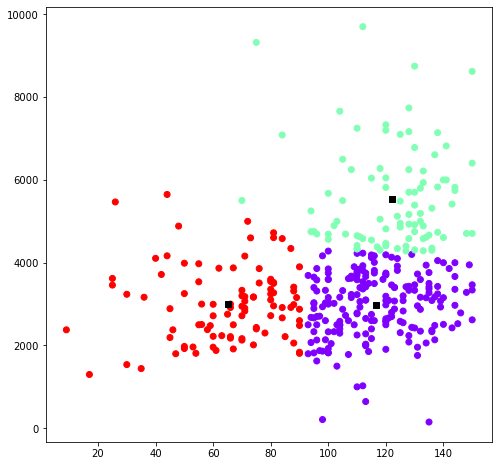

In [105]:
plt.figure(figsize=(8,8))
plt.scatter(data.LoanAmount, data.ApplicantIncome, c= data.Group, cmap='rainbow')
plt.scatter(normal_centroids[:, 0], normal_centroids[:, 1], marker = "s",c='black')
plt.show()

- The customers could be discriminated into 3 groups:
    - Group 1: LoanAmount <= 80
               ApplicantIncome <= 5000
    - Group 2: LoanAmount >= 80
               ApplicantIncome <= 4550
    - Group 3: LoanAmount >= 80
               ApplicantIncome >= 5500
                  
               